In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import statsmodels.api as sm

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [2]:
df_1=pd.read_csv('project2/Seoul.csv')

In [3]:
df_2=pd.read_csv('project2/Seoul_Test.csv')

In [4]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [5]:
df_1['년'] = df_1['연월'].apply(lambda x: grap_year(x))
df_1['월'] = df_1['연월'].apply(lambda x: grap_month(x))
df_1 = df_1.drop(['연월'], axis=1)

In [6]:
df_2['년'] = df_2['연월'].apply(lambda x: grap_year(x))
df_2['월'] = df_2['연월'].apply(lambda x: grap_month(x))
df_2 = df_2.drop(['연월'], axis=1)

In [7]:
dtypes = df_1.dtypes
encoders = {}
for column in df_1.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df_1[column])
        encoders[column] = encoder
        
df_1_num = df_1.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_1_num[column] = encoder.transform(df_1[column])

In [8]:
dtypes = df_2.dtypes
encoders = {}
for column in df_2.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df_2[column])
        encoders[column] = encoder
        
df_2_num = df_2.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_2_num[column] = encoder.transform(df_2[column])

In [53]:
y_train=df_1_num.loc[:,'이용금액']
X_train=df_1_num.loc[:,df_1_num.columns !='이용금액']

y_test=df_2_num.loc[:,'이용금액']
X_test=df_2_num.loc[:,df_2_num.columns !='이용금액']

In [65]:
X=np.append(X_train,X_test)
y=np.append(y_train,y_test)

In [67]:
X_train

,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용건수,년,월
0,0,0,0,0,3,5,2,5,7,8,2019,1
1,0,0,0,0,102,4,2,4,3,4,2019,1
2,0,0,0,0,156,4,2,4,6,14,2019,1
3,0,0,0,0,156,5,2,5,6,7,2019,1
4,0,0,0,0,201,4,2,4,4,11,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6259497,0,24,38,11,89,3,2,3,3,3,2020,3
6259498,0,24,38,11,89,4,1,4,9,10,2020,3
6259499,0,24,38,11,89,4,2,4,16,17,2020,3
6259500,0,24,38,11,89,5,1,5,6,6,2020,3


In [64]:
X

array([   0,    0,    0, ...,    9, 2020,    4], dtype=int64)

In [66]:
y

array([1181300,  756000, 2480710, ...,   72900,   64800,  126300],
      dtype=int64)

In [54]:
# define regressor type, and fit with train set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [55]:
regressor.coef_

array([      0.        ,  -30091.32396028,  -23141.00576086,
          6033.37726646,    -488.76540572,  146971.71268709,
       -308122.85842216,  223726.95881875,   31756.45803247,
          1042.8908275 ,   75626.53609154,     520.90182279])

In [56]:
y_pred = regressor.predict(X_test)

Text(0.5, 0, 'True (ground truth)')

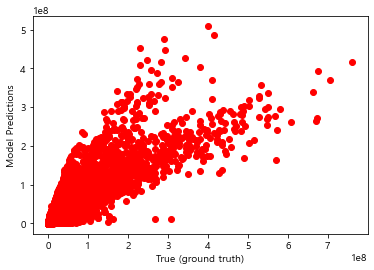

In [57]:
plt.scatter(y_test, y_pred, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

In [58]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

# RMSE(평균 제곱근 오차(Root Mean Square Error))
# https://en.wikipedia.org/wiki/Root-mean-square_deviation
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test - y_pred) / y_test ) ) * 100

print('RMSE =',RMSE, 
      '\nMSE =',MSE, 
      '\nMAE =',MAE, 
      '\nR2 =', r2, 
      '\nAdjusted R2 =', adj_r2, 
      '\nMean Absolute Percentage Error =', MAPE, '%') 


RMSE = 6627683.805720985 
MSE = 43926192628616.2 
MAE = 1530396.3502600351 
R2 = 0.7604848817843577 
Adjusted R2 = 0.7604766294481563 
Mean Absolute Percentage Error = 464.815112519868 %


In [61]:
from scipy import stats
# https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

params = np.append(regressor.intercept_,regressor.coef_)
predictions = regressor.predict(X_train)

# newX = pd.DataFrame({"Constant":np.ones(len(X_train))}).join(pd.DataFrame(X_train.reset_index(drop=True)))
# MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
newX = np.append(np.ones((len(X_train),1)), X, axis=1)
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX.values[0])))) for i in ts_b]


sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

df_summary = pd.DataFrame()
df_summary["Coefficients"],df_summary["Standard Errors"],df_summary["t values"],df_summary["Probabilities"] = [params,sd_b,ts_b,p_values]
df_summary.index = ['constant'] + list(X_train.columns)
df_summary

NameError: name 'X' is not defined

* 그룹화 해서 모델링 (실제 사용해야하는 모델)

In [43]:
df_11=df_1.groupby(['년','월','매장_시도','매장_시군구','업종명','성별','가구생애주기']).sum().reset_index()

In [44]:
df_22=df_2.groupby(['년','월','매장_시도','매장_시군구','업종명','성별','가구생애주기']).sum().reset_index()

In [45]:
dtypes = df_11.dtypes
encoders = {}
for column in df_11.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df_11[column])
        encoders[column] = encoder
        
df_11_num = df_11.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_11_num[column] = encoder.transform(df_11[column])

dtypes = df_22.dtypes
encoders = {}
for column in df_22.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df_22[column])
        encoders[column] = encoder
        
df_22_num = df_22.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_22_num[column] = encoder.transform(df_22[column])

In [46]:
y_train=df_11_num.loc[:,'이용금액']
X_train=df_11_num.loc[:,df_11_num.columns !='이용금액']

y_test=df_22_num.loc[:,'이용금액']
X_test=df_22_num.loc[:,df_22_num.columns !='이용금액']

In [38]:
df_11_num

,년,월,매장_시도,매장_시군구,업종명,성별,가구생애주기,이용고객수,이용금액,이용건수
0,2019,1,0,0,0,1,1,31,1405000,36
1,2019,1,0,0,0,1,2,110,11861050,121
2,2019,1,0,0,0,1,3,86,26041090,120
3,2019,1,0,0,0,1,4,191,79951020,333
4,2019,1,0,0,0,1,5,124,40362670,192
...,...,...,...,...,...,...,...,...,...,...
106860,2020,3,0,24,38,2,1,608,12830505,708
106861,2020,3,0,24,38,2,2,492,13213425,568
106862,2020,3,0,24,38,2,3,281,9646440,362
106863,2020,3,0,24,38,2,4,1074,50109146,1286


In [37]:
df_22_num

,년,월,매장_시도,매장_시군구,업종명,성별,가구생애주기,이용고객수,이용금액,이용건수
0,2020,4,0,0,0,1,1,39,688400,39
1,2020,4,0,0,0,1,2,63,1806500,69
2,2020,4,0,0,0,1,3,47,5935900,49
3,2020,4,0,0,0,1,4,49,23188800,78
4,2020,4,0,0,0,1,5,44,5760806,54
...,...,...,...,...,...,...,...,...,...,...
6739,2020,4,0,24,38,2,1,562,11699785,655
6740,2020,4,0,24,38,2,2,512,15386030,592
6741,2020,4,0,24,38,2,3,327,11730268,399
6742,2020,4,0,24,38,2,4,1143,46223490,1333


In [47]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
regressor.coef_

array([-3.87500235e+06,  5.77862155e+04, -1.65406163e-07, -1.05899684e+06,
        9.37103196e+05, -1.76196879e+07,  1.35510635e+07,  1.09537836e+04,
        4.73716544e+03])

In [50]:
y_pred = regressor.predict(X_test)

Text(0.5, 0, 'True (ground truth)')

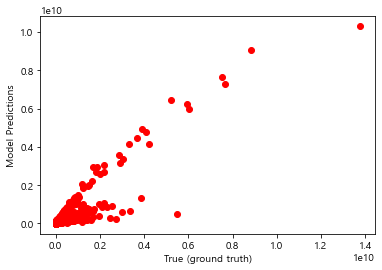

In [51]:
plt.scatter(y_test, y_pred, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

In [52]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

# RMSE(평균 제곱근 오차(Root Mean Square Error))
# https://en.wikipedia.org/wiki/Root-mean-square_deviation
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test - y_pred) / y_test ) ) * 100

print('RMSE =',RMSE, 
      '\nMSE =',MSE, 
      '\nMAE =',MAE, 
      '\nR2 =', r2, 
      '\nAdjusted R2 =', adj_r2, 
      '\nMean Absolute Percentage Error =', MAPE, '%') 

RMSE = 168541275.0337716 
MSE = 2.840616139000944e+16 
MAE = 74682410.38184135 
R2 = 0.7961778381135862 
Adjusted R2 = 0.7959054295218164 
Mean Absolute Percentage Error = 2999.126731807048 %
